# 📊 Multiple Regression with Our Class Survey Data

**Welcome back!** Last time, we explored *simple* linear regression using the class survey you created.  
Today we’ll extend that to **multiple regression** — asking how an outcome **Y** varies with **several** predictors **X₁, X₂, …** at the same time.

👩‍💻👨‍💻 **Work in your final‑project groups.** Discuss choices and interpretations together.


Group Members: Howie Brown, Eshan Momin, Ashley Mazarin, Caleigh Shapiro

## Why we’re also practicing prompt engineering
We’ll include **helpful prompts** you can adapt for your AI assistant of choice.  
The goal is for you to **engineer your own prompts**, adapt variable names, and verify outputs — a core skill for modern data analysis.

> Tip: Don’t just paste code. **Edit it to fit your variables and `df`**, and make sure you understand what each line does.


---
## Setup — Imports & Load the Survey Data

**Goal:** Keep all imports in one place. Load the *same survey dataset* as last time, drop the timestamp column, and apply short, consistent column names (camelCase or snake_case — pick one style and stick to it).

> If `read_excel` complains about `openpyxl`, install it in a new cell with: `!pip install openpyxl` and then re-run.


In [1]:
# 📦 Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# Display options
pd.set_option("display.max_columns", 100)
plt.rcParams["figure.figsize"] = (7, 4)
plt.rcParams["axes.grid"] = True


In [2]:
# 📂 Load the survey data here
data_path = "survey.xlsx"  # <- update if needed

# --- Load raw file (first row already contains the long questions as column names) ---
df_raw = pd.read_excel(data_path)
print("Raw columns:", list(df_raw.columns))
display(df_raw.head())

Raw columns: ['Timestamp', 'How many hours of sleep did you get last night? ', '  How many cups of coffee (or tea / energy drinks / mysterious liquids) have you consumed today?  ', '  On a scale from 1 to 10, how energetic do you feel right now?  ', '  How many hours per day do you spend on social media (Instagram, TikTok, LinkedIn if you’re fancy, etc.)?  ', '  How many titk toks, reels, memes, did you share last week? (Number. Honesty is optional, but recommended.)  ', '  On a scale from 1 to 10, how confident are you in public speaking?  ', '  If you have a part-time job: how many hours per week do you work? (Number. If none, type 0 and enjoy your free time.) ', '  How stressed do you feel on a scale from 1?  ', '  How long is your commute to campus (in minutes)?  ', '  How many siblings do you have? (If you lost count, just estimate.)', 'How patient are you, really?  ', 'How many languages do you speak (fluently, or at least confidently enough to order food)?  ']


,Timestamp,How many hours of sleep did you get last night?,How many cups of coffee (or tea / energy drinks / mysterious liquids) have you consumed today?,"On a scale from 1 to 10, how energetic do you feel right now?","How many hours per day do you spend on social media (Instagram, TikTok, LinkedIn if you’re fancy, etc.)?","How many titk toks, reels, memes, did you share last week? (Number. Honesty is optional, but recommended.)","On a scale from 1 to 10, how confident are you in public speaking?","If you have a part-time job: how many hours per week do you work? (Number. If none, type 0 and enjoy your free time.)",How stressed do you feel on a scale from 1?,How long is your commute to campus (in minutes)?,"How many siblings do you have? (If you lost count, just estimate.)","How patient are you, really?","How many languages do you speak (fluently, or at least confidently enough to order food)?"
0,2025-09-18 15:51:15.502,5,1.0,7,2.0,20.0,8.0,0.0,5.0,3.0,4.0,8,3.0
1,2025-09-18 18:05:06.887,3,NaN,6,NaN,NaN,NaN,NaN,6.0,NaN,NaN,3,NaN
2,2025-09-19 11:32:59.637,8,1.0,8,3.0,50.0,9.0,0.0,6.0,2.0,1.0,8,2.0
3,2025-09-19 11:34:36.675,7,1.0,8,5.0,0.0,4.0,5.0,7.0,7.0,1.0,9,2.0
4,2025-09-19 11:35:18.522,8,1.0,7,3.0,4.0,8.0,0.0,1.0,3.0,1.0,9,3.0


In [3]:
# Drop the timestamp column (assuming it's the first one)
df = df_raw.drop(columns=[df_raw.columns[0]])

# Desired short names for the remaining columns (in order)
short_names = [
    "sleepHours",
    "coffeeCups",
    "energyLevel",
    "socialMediaHours",
    "memesShared",
    "publicSpeakingConf",
    "jobHours",
    "stressLevel",
    "commuteMinutes",
    "siblingsCount",
    "patienceLevel",
    "languagesSpoken"
]

# Apply new column names
df.columns = short_names

print("Final column names:", list(df.columns))
df.head()


Final column names: ['sleepHours', 'coffeeCups', 'energyLevel', 'socialMediaHours', 'memesShared', 'publicSpeakingConf', 'jobHours', 'stressLevel', 'commuteMinutes', 'siblingsCount', 'patienceLevel', 'languagesSpoken']


,sleepHours,coffeeCups,energyLevel,socialMediaHours,memesShared,publicSpeakingConf,jobHours,stressLevel,commuteMinutes,siblingsCount,patienceLevel,languagesSpoken
0,5,1.0,7,2.0,20.0,8.0,0.0,5.0,3.0,4.0,8,3.0
1,3,NaN,6,NaN,NaN,NaN,NaN,6.0,NaN,NaN,3,NaN
2,8,1.0,8,3.0,50.0,9.0,0.0,6.0,2.0,1.0,8,2.0
3,7,1.0,8,5.0,0.0,4.0,5.0,7.0,7.0,1.0,9,2.0
4,8,1.0,7,3.0,4.0,8.0,0.0,1.0,3.0,1.0,9,3.0


---
## Exercise 1 — Explore your data

**Goal:** Choose an outcome **Y** and at least two predictors **X’s**. Describe and visualize them *before* running any regression.

**Tasks:**
1. Select your `y_var` and `x_vars` (≥ 2 variables).
2. Show **summary statistics** (`.describe()`) for Y and each X.
3. Plot **histograms** for Y and each X.
4. Plot **scatterplots** of **Y vs each X**.

**Helpful prompt for AI (copy & edit):**  
> “Write Python code to print summary statistics, plot histograms, and create scatterplots of a chosen Y against each X from a pandas DataFrame `df`. Variables are given in strings `y_var` and list `x_vars`.”

**Reflection (write in the text cell after code):**
- Are the distributions symmetric or skewed? Any outliers?
- Do the scatterplots suggest positive, negative, or weak/no associations?


Summary Statistics:
       energyLevel  sleepHours  coffeeCups
count    67.000000   67.000000   61.000000
mean      5.268657    6.865672    1.114754
std       1.788703    1.594456    0.369611
min       1.000000    1.000000    1.000000
25%       4.000000    6.000000    1.000000
50%       6.000000    7.000000    1.000000
75%       6.000000    8.000000    1.000000
max       9.000000   10.000000    3.000000


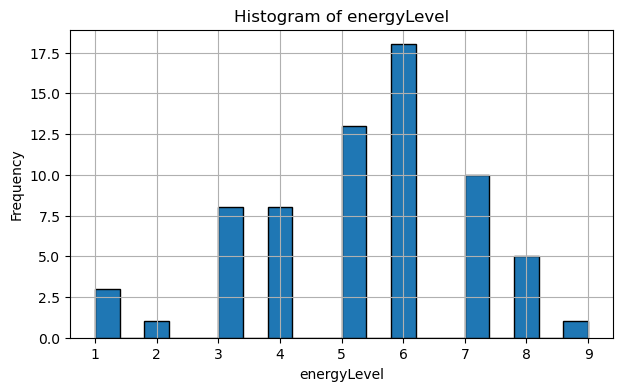

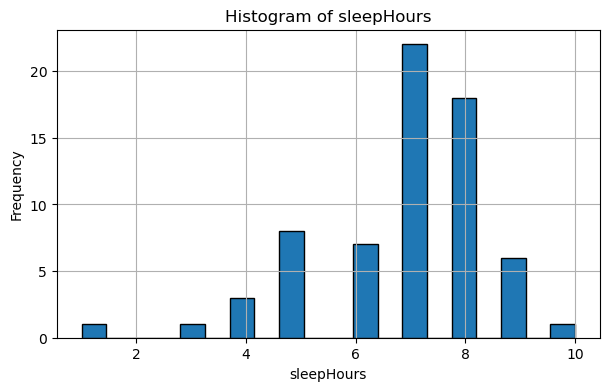

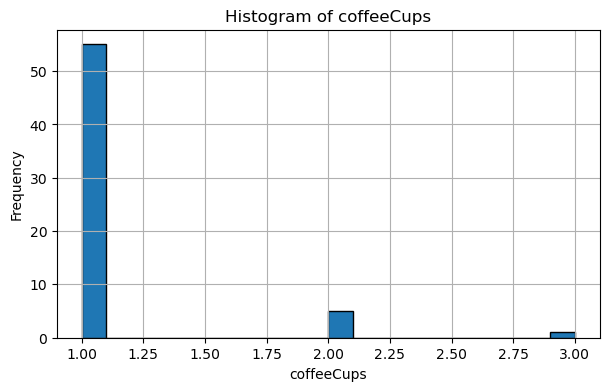

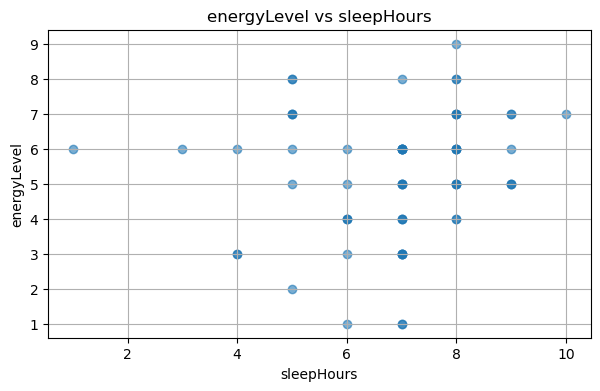

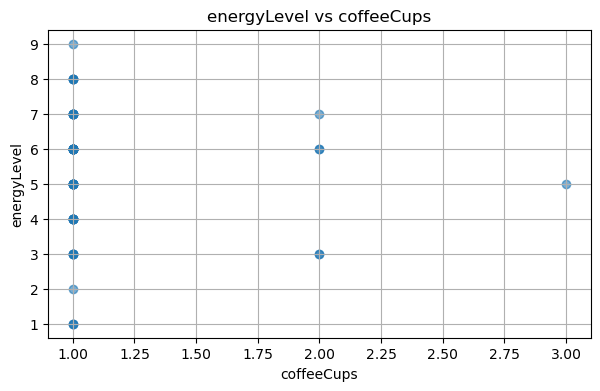

In [4]:
# 👉 code here
import pandas as pd
import matplotlib.pyplot as plt

# Example choices (edit these!)
y_var = "energyLevel"
x_vars = ["sleepHours", "coffeeCups"]

# --- Summary statistics ---
print("Summary Statistics:")
print(df[[y_var] + x_vars].describe())

# --- Histograms ---
for col in [y_var] + x_vars:
    plt.hist(df[col], bins=20, edgecolor="black")
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

# --- Scatterplots of Y vs each X ---
for col in x_vars:
    plt.scatter(df[col], df[y_var], alpha=0.6)
    plt.title(f"{y_var} vs {col}")
    plt.xlabel(col)
    plt.ylabel(y_var)
    plt.show()


**Group Reflection (text):**  
_Summarize what you observe about distributions and pairwise patterns. Do the signs match your intuition?_

The distributions show typical patterns (normal-ish for sleep and energy, skewed for coffee). Scatterplots suggest sleep is positively associated with energy level, while coffee has a weaker, possibly negative relationship with energy. The signs for sleep and energy being positive makes sense intuitively as you would expect more sleep to be correlated with higher energy level. It is surprising to not see a positive relationship with coffee and energy as we would also expect those who drink more coffee to report higher energy.

---
## Exercise 2 — Run a multiple regression

**Goal:** Fit a model of **Y** on **X₁ + X₂ + …** and read the regression table.

**Helpful prompt for AI (copy & edit):**  
> “Give me Python code using `statsmodels` to run a multiple regression of `y_var` on the variables in `x_vars` from a DataFrame `df`, then print the coefficients and R².”

**Reminder:** Focus on **signs** and **magnitudes** of coefficients and on **R² / Adjusted R²**. We will not discuss p‑values yet.


In [7]:
import statsmodels.api as sm

# Example choices
y_var = "energyLevel"
x_vars = ["sleepHours", "coffeeCups"]

# Define X and Y
X = df[x_vars]
X = sm.add_constant(X)   # adds the intercept
y = df[y_var]

# Drop rows with missing values in X or y
data = pd.concat([y, X], axis=1).dropna()
y = data[y_var]
X = data[x_vars + ["const"]]  # keep intercept + predictors

# Fit regression
model = sm.OLS(y, X).fit()

# Print results
print(model.summary())

# Quick version: coefficients and R-squared
print("Coefficients:\n", model.params)
print("\nR-squared:", model.rsquared)
print("Adjusted R-squared:", model.rsquared_adj)


                            OLS Regression Results                            
Dep. Variable:            energyLevel   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                 -0.011
Method:                 Least Squares   F-statistic:                    0.6808
Date:                Fri, 26 Sep 2025   Prob (F-statistic):              0.510
Time:                        12:20:15   Log-Likelihood:                -122.34
No. Observations:                  61   AIC:                             250.7
Df Residuals:                      58   BIC:                             257.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
sleepHours     0.1708      0.153      1.114      0.2

The regression results suggest that each additional hour of sleep is associated with about a 0.17-unit increase in energy level, while each additional cup of coffee is linked to a 0.16-unit decrease in energy level, holding the other variable constant. The intercept of 4.27 units represents the predicted baseline energy for someone with zero sleep and zero cups of coffee. By magnitude, coffee consumption (–0.16 per cup) appears less impactful than sleep (+0.17 per hour), but not by much. The signs for sleep align with expectations from Exercise 1: more sleep tends to raise energy, but we are still surprised by the coffee since heavier coffee consumption is tied to lower energy levels.

**Group Reflection (text):**  
- Interpret each coefficient in plain language (units!).  
- Which predictors seem most impactful for Y (by magnitude)?  
- Do the signs match your expectations from Exercise 1?

---
## Exercise 3 — Compare simple vs multiple

**Goal:** See how adding covariates changes a coefficient.

**Tasks:**
1. Run a **simple regression** of Y on one X (pick one from `x_vars` and call it `x1`).
2. Compare the coefficient on `x1` in the simple model vs. in your multiple regression.

**Helpful prompt for AI (copy & edit):**  
> “Give me Python code to fit both `y_var ~ x1` and `y_var ~ x1 + ... (other X’s)` and to print the two coefficients side by side.”

**Reflection:** Did the coefficient on `x1` change size or sign? Why might that happen when we include more variables?


In [8]:
# your code here
import statsmodels.api as sm
import pandas as pd

# Example choices
y_var = "energyLevel"
x1 = "sleepHours"               # predictor to compare
other_xs = ["coffeeCups"]        # other predictors to add

# --- Simple regression (Y ~ x1) ---
X_simple = sm.add_constant(df[[x1]])
y = df[y_var]

# Drop missing values
data_simple = pd.concat([y, X_simple], axis=1).dropna()
y_simple = data_simple[y_var]
X_simple = data_simple[[x1, "const"]]

model_simple = sm.OLS(y_simple, X_simple).fit()

# --- Multiple regression (Y ~ x1 + other_xs) ---
X_multi = sm.add_constant(df[[x1] + other_xs])
data_multi = pd.concat([y, X_multi], axis=1).dropna()
y_multi = data_multi[y_var]
X_multi = data_multi[[x1] + other_xs + ["const"]]

model_multi = sm.OLS(y_multi, X_multi).fit()

# --- Compare coefficients on x1 ---
print("Coefficient on", x1)
print("Simple regression:", model_simple.params[x1])
print("Multiple regression:", model_multi.params[x1])


Coefficient on sleepHours
Simple regression: 0.15744529443159547
Multiple regression: 0.17079074399369223


**Group Reflection (text):**  
_Did the coefficient on your chosen X change meaningfully when you added other X’s? Offer a plain-language explanation._

The coefficient on sleep increased a little (less than 0.2) when coffee was added to the model. This suggests that part of the relationship between sleep and energy was confounded by coffee consumption. After accounting for coffee, the positive effect of sleep on energy appears slightly stronger, though the change is small.

---
## Exercise 4 — Model fit: R² and Adjusted R²

**Goal:** Read model fit metrics and relate them to your data.

**Helpful prompt for AI (copy & edit):**  
> “How do I extract R² and Adjusted R² from a fitted `statsmodels` OLS model in Python?”

**Tasks:**
- Report **R²** and **Adjusted R²** from your multiple regression.
- Briefly explain what they indicate about how well your X’s explain Y.
- Did adding predictors improve Adjusted R²?


In [9]:
# your code here
# After fitting your model
print("R-squared:", model.rsquared)
print("Adjusted R-squared:", model.rsquared_adj)


R-squared: 0.022938809182271758
Adjusted R-squared: -0.010752956018339699


The Adjusted R² shows that adding our chosen X's did not improve the model in a meaningful way. Conversely, it conveys that the chosen X values made the model worse at explaining Y which is evident by the Adjusted R² yielding a negative value. This demonstrates that the added independent variables were not helpfu explaining the dependent variable and the overall fit was worse by including them. 

**Group Reflection (text):**  
_Does Adjusted R² confirm that adding your chosen X’s improved the model in a meaningful way?_

---
## Exercise 5 — Predicted vs. Actual

**Goal:** Compare predictions from your model to the actual values of Y.

**Tasks:**
1. Compute predicted values \(\hat{Y}\) from your multiple regression.
2. Plot **Actual Y vs. Predicted Y** (add a 45° reference line).
3. Optionally, plot **residuals = Y − \(\hat{Y}\)** vs. \(\hat{Y}\).

**Helpful prompt for AI (copy & edit):**  
> “Give me Python/matplotlib code to plot actual Y vs predicted Y from a fitted `statsmodels` model, with a 45-degree reference line.”


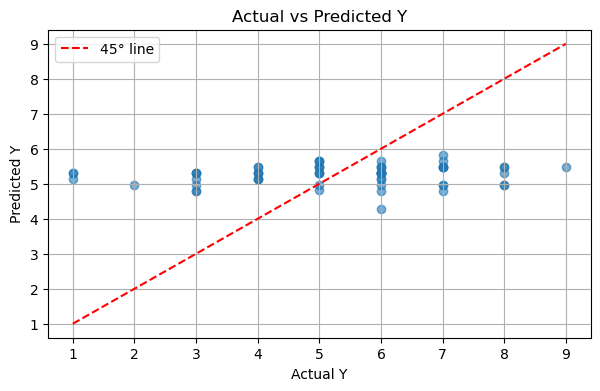

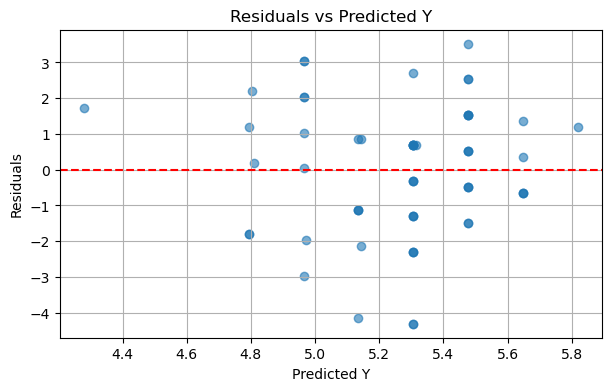

In [10]:
# your code here
import matplotlib.pyplot as plt

# Predicted values (Ŷ)
y_pred = model.fittedvalues

# Actual Y
y_actual = model.model.endog

# --- Plot Actual vs Predicted ---
plt.scatter(y_actual, y_pred, alpha=0.6)
plt.plot([y_actual.min(), y_actual.max()],
         [y_actual.min(), y_actual.max()],
         color="red", linestyle="--", label="45° line")
plt.xlabel("Actual Y")
plt.ylabel("Predicted Y")
plt.title("Actual vs Predicted Y")
plt.legend()
plt.show()

# --- Optional: Residuals vs Predicted ---
residuals = y_actual - y_pred

plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Predicted Y")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Y")
plt.show()


**Group Reflection (text):**  
_Do points cluster near the 45° line? Any patterns in the residuals worth noting?_

The points do not cluster near the 45º line in the Actual vs. Predicted Y plot which means that the predicted values are not very accurate. In the Residuals vs. Predicted Y plot, the errors are spread above and below 0 without any distinct patterns. The clustering around certain predicted values is worth noting, suggesting the plot is failing to capture variation in the data and creates errors in estimating some of the ranges for the predicted Y values.

---
## Exercise 6 — Wrap‑Up \& Compare to Your Hypothesis

**Goal:** Arrive at a clear conclusion based on your analysis.

**Write a short paragraph:**
- Restate your **hypothesis** from before running any code (expected signs/magnitudes).
- Summarize your **findings**: which predictors matter most (by sign and size)?
- Did the results align with your hypothesis?
- One limitation of your analysis (e.g., small sample, unmeasured factors, correlation ≠ causation).


Our hypothesis was the more sleep hours would be positively correlated to higher energy levels. The regression results showed a positive slope (approximately +0.16) which can be intrepretted as a small increase in energy for an additional hour of sleep. The R^2 value was very low (approximately 0.02) which conveys that sleep hours explained very little of variation in energy levels. Although the coefficient sign aligned with our hypothesis, the weak fit suggestes that other predictors are more important (i.e. exercise, stress, etc.). One limitation of our analysis is that there was a small sample size based off of a one-time survey so we cannot make strong casual claims from this analysis. 